In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

#mpl.rc("figure",dpi=150)
#mpl.rc("figure",figsize=(3,2))

#plt.rcParams["font.family"] = "Times New Roman"

# Angular Velocity vs Frequency

In [2]:
csv_dir = './results_csv/'
csv_name = "frequency_vs_velocity.dat" #4 spikes
csv_name2 = "3_spikes.dat"#3 spikes

data = pd.read_csv(csv_dir + csv_name, sep = "\t", index_col = 0) #4 spikes
data2 = pd.read_csv(csv_dir + csv_name2, sep = "\t", index_col = 0) #3 spikes
data.head()

,v_up,v_up_error,v_dw,v_dw_error
frequencies,,,,
0.00,-0.000067,0.000022,0.000322,0.000060
1.00,-0.000428,0.000037,-0.000700,0.000216
2.00,-0.000328,0.000037,-0.000298,0.000121
3.00,0.000074,0.000047,-0.000499,0.000175
3.25,0.002841,0.000081,-0.001107,0.000317


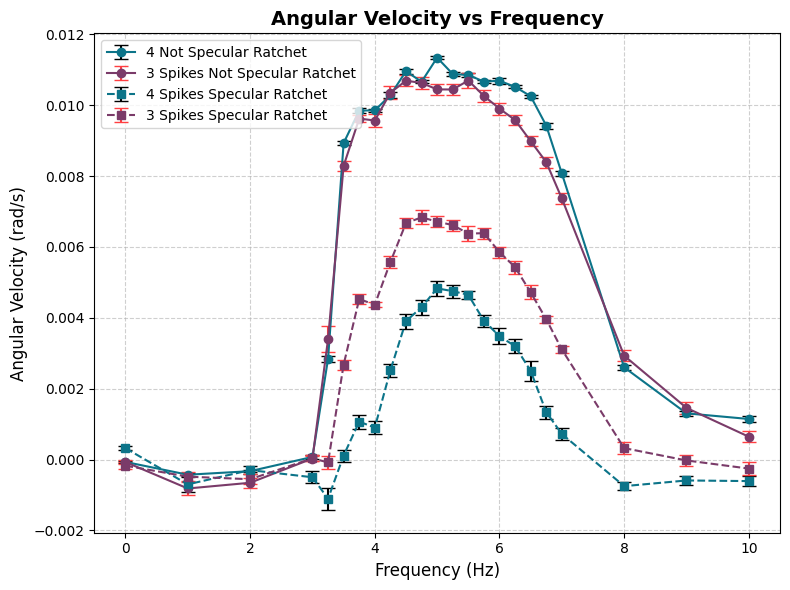

In [3]:
frequencies = data.index.values

##4 spikes
velocity_per_freq_normal = data.v_up
error_per_freq_normal =  data.v_up_error

velocity_per_freq_mirror =  data.v_dw
error_per_freq_mirror =  data.v_dw_error

#3 spikes
velocity_per_freq_normal2 = data2.v_up
error_per_freq_normal2 =  data2.v_up_error

velocity_per_freq_mirror2 =  data2.v_dw
error_per_freq_mirror2 =  data2.v_dw_error


# Crear una sola figura con un solo eje
plt.figure(figsize=(8, 6))

# Graficar ambos conjuntos de datos en el mismo eje
## 4 spikes
plt.errorbar(
    frequencies,
    velocity_per_freq_normal,
    yerr=error_per_freq_normal,
    fmt='o-',  # Marcadores circulares con línea continua
    color='#0C7489',#'blue',
    ecolor='#000000',  # Color de las barras de error
    capsize=5,     # Tamaño de las líneas horizontales en las barras de error
    label='4 Not Specular Ratchet'
)

# 3 spikes
plt.errorbar(
    frequencies,
    velocity_per_freq_normal2,
    yerr=error_per_freq_normal2,
    fmt='o-',  # Marcadores circulares con línea continua
    color='#7A3B69',
    ecolor='#FF3E41',  # Color de las barras de error
    capsize=5,     # Tamaño de las líneas horizontales en las barras de error
    label='3 Spikes Not Specular Ratchet'
)

#4 spiks
plt.errorbar(
    frequencies,
    velocity_per_freq_mirror,
    yerr=error_per_freq_mirror,
    fmt='s--',  # Marcadores cuadrados con línea discontinua
    color='#0C7489',
    ecolor='#000000',
    capsize=5,
    label='4 Spikes Specular Ratchet'
)

#3 spikes

plt.errorbar(
    frequencies,
    velocity_per_freq_mirror2,
    yerr=error_per_freq_mirror2,
    fmt='s--',  # Marcadores cuadrados con línea discontinua
    color='#7A3B69',
    ecolor='#FF3E41',
    capsize=5,
    label='3 Spikes Specular Ratchet'
)

# Configuración del gráfico
plt.title('Angular Velocity vs Frequency', fontsize=14, fontweight='bold')
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Angular Velocity (rad/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Ajustar diseño y mostrar figura
plt.tight_layout()
plt.savefig("./figures/AvsF.svg", format="svg")
plt.show()


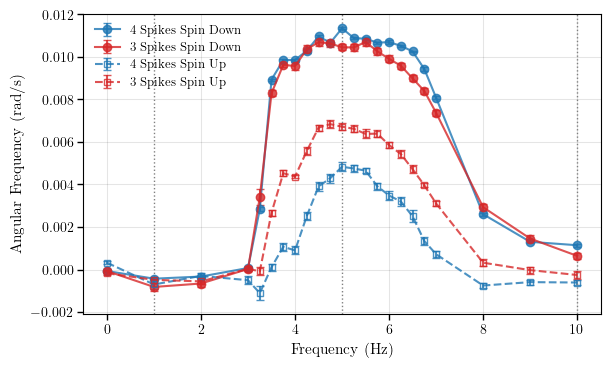

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Set style for publication-quality plots
#plt.style.use('default')  # Reset to default for full control
plt.rcParams.update({
    "text.usetex": True,          # Use LaTeX to render all text
    "font.family": "serif",       # Use serif font (like LaTeX)
    "font.serif": ["Computer Modern"],  # Use Computer Modern (LaTeX default)
    "font.size": 11,              # Match your document font size
})

# Create figure with exact width for LaTeX (460pt = 460/72 = ~6.39 inches)
fig_width_pt = 460
inches_per_pt = 1/72.27
fig_width = fig_width_pt * inches_per_pt
# Golden ratio for height
golden_ratio = (5**0.5 - 1)/2
fig_height = fig_width * golden_ratio

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height))

# Define colors and styles for better distinction
colors = {
    '4_spikes': '#1f77b4',  # Professional blue
    '3_spikes': '#d62728',  # Professional red
}

marker_styles = {
    'normal': ('o', '-', 6),  # (marker, linestyle, markersize)
    'mirror': ('s', '--', 5), # square, dashed
}

# Plot data with improved styling
## 4 spikes - Normal
ax.errorbar(
    frequencies,
    velocity_per_freq_normal,
    yerr=error_per_freq_normal,
    fmt=marker_styles['normal'][1] + marker_styles['normal'][0],
    color=colors['4_spikes'],
    ecolor=colors['4_spikes'],
    alpha=0.8,
    markersize=marker_styles['normal'][2],
    capsize=3,
    capthick=1,
    linewidth=1.5,
    label='4 Spikes Spin Down'
)

## 3 spikes - Normal
ax.errorbar(
    frequencies,
    velocity_per_freq_normal2,
    yerr=error_per_freq_normal2,
    fmt=marker_styles['normal'][1] + marker_styles['normal'][0],
    color=colors['3_spikes'],
    ecolor=colors['3_spikes'],
    alpha=0.8,
    markersize=marker_styles['normal'][2],
    capsize=3,
    capthick=1,
    linewidth=1.5,
    label='3 Spikes Spin Down'
)

## 4 spikes - Mirror
ax.errorbar(
    frequencies,
    velocity_per_freq_mirror,
    yerr=error_per_freq_mirror,
    fmt=marker_styles['mirror'][1] + marker_styles['mirror'][0],
    color=colors['4_spikes'],
    ecolor=colors['4_spikes'],
    alpha=0.8,
    markersize=marker_styles['mirror'][2],
    capsize=3,
    capthick=1,
    linewidth=1.5,
    label='4 Spikes Spin Up',
    fillstyle='none'  # Hollow markers for better distinction
)

## 3 spikes - Mirror
ax.errorbar(
    frequencies,
    velocity_per_freq_mirror2,
    yerr=error_per_freq_mirror2,
    fmt=marker_styles['mirror'][1] + marker_styles['mirror'][0],
    color=colors['3_spikes'],
    ecolor=colors['3_spikes'],
    alpha=0.8,
    markersize=marker_styles['mirror'][2],
    capsize=3,
    capthick=1,
    linewidth=1.5,
    label='3 Spikes Spin Up',
    fillstyle='none'
)

# ADD VERTICAL LINES HERE
vertical_frequencies = [1, 5, 10]
for freq in vertical_frequencies:
    ax.axvline(x=freq, color='gray', linestyle=':', alpha=1, linewidth=1)

# Publication-quality styling
ax.set_xlabel('Frequency (Hz)', fontsize=11, fontweight='normal')
ax.set_ylabel('Angular Frequency (rad/s)', fontsize=11, fontweight='normal')

# Improve ticks
ax.tick_params(axis='both', which='major', labelsize=10, direction='out', length=4, width=1)
ax.tick_params(axis='both', which='minor', direction='out', length=2, width=1)

# Add light grid
ax.grid(True, linestyle='-', alpha=0.1, color='black')

# Clean up spines
for spine in ax.spines.values():
    spine.set_linewidth(0.8)
    spine.set_color('black')

# Legend with better placement and styling
legend = ax.legend(
    fontsize=9,
    frameon=False,
    fancybox=False,
    framealpha=0.9,
    edgecolor='black',
    facecolor='white',
    loc='upper left'  # Automatically choose best location
)
legend.get_frame().set_linewidth(0.5)

# Remove title (typically included in LaTeX caption instead)
# plt.title('Angular Velocity vs Frequency', fontsize=14, fontweight='bold')

# Set tight layout with padding
plt.tight_layout(pad=1.5)

# Save in multiple formats for publication

plt.savefig("./figures/AvsF.svg", format="svg", bbox_inches='tight', dpi=300)
plt.savefig("./figures/AvsF.pdf", format="pdf", bbox_inches='tight', dpi=300)
plt.savefig("./figures/AvsF.png", format="png", bbox_inches='tight', dpi=300)
plt.savefig("../../thesis/manuscript/figures/AvsF.svg", format="svg", bbox_inches='tight', dpi=300)
plt.savefig("../../thesis/manuscript/figures/AvsF.pdf", format="pdf", bbox_inches='tight', dpi=300)

plt.show()